In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa
import pymc3 as pm
import arviz as az

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from data.utils import pmf_from_dist, plot_cdf, plot_pred

In [3]:
alpha = 1.4
beta = 1
prior_dist = ss.gamma(alpha, scale=1/beta)

In [4]:
sample_prior = prior_dist.rvs(1000)
sample_prior

array([0.72967269, 0.85536725, 4.58163742, 1.07839088, 0.88862547,
       0.01939092, 0.79125231, 0.24867703, 0.77631926, 1.36685422,
       1.91608813, 1.22167942, 1.73705872, 2.74430662, 1.73789747,
       0.85530625, 0.84652955, 0.97260508, 2.84722228, 2.4226558 ,
       0.65779137, 1.74986291, 1.87392658, 4.12176738, 1.53680422,
       0.79074888, 0.25198803, 1.50669782, 1.63286347, 1.92865536,
       1.32682834, 1.61200725, 0.36673512, 0.97952936, 3.89603888,
       4.35714094, 2.55669844, 0.88461643, 2.80973579, 2.38144719,
       0.81451408, 0.6938657 , 2.3287684 , 4.70249989, 0.32592547,
       0.59429347, 0.46110451, 0.37953524, 0.40263795, 0.83290933,
       1.94033488, 2.8711983 , 1.48165286, 1.02494857, 0.31161646,
       1.31214356, 1.96171365, 2.14967796, 3.0623017 , 1.10086306,
       0.45243132, 2.30085667, 0.8174642 , 4.68628932, 1.92935948,
       3.50253875, 0.42360225, 0.58605271, 1.05483228, 1.2630059 ,
       4.49820693, 1.68631515, 0.08042457, 5.29647421, 1.94713

In [5]:
sample_prior_pred = ss.poisson.rvs(sample_prior)
sample_prior_pred

array([ 0,  1,  4,  2,  1,  0,  0,  0,  4,  1,  0,  0,  1,  4,  1,  2,  2,
        2,  4,  3,  2,  3,  1,  3,  5,  0,  0,  1,  2,  0,  0,  3,  0,  0,
        5,  2,  2,  0,  0,  3,  2,  0,  2,  5,  2,  0,  0,  0,  0,  0,  3,
        4,  1,  0,  0,  1,  1,  1,  8,  0,  0,  2,  3,  4,  0,  3,  0,  0,
        0,  0,  4,  1,  0,  9,  2,  0,  0,  0,  1,  0,  2,  0,  0,  0,  2,
        1,  0,  0,  2,  0,  0,  1,  2,  6,  0,  9,  2,  2,  2,  1,  0,  2,
        3,  4,  6,  4,  2,  0,  2,  6,  1,  0,  2,  0,  3,  0,  1,  0,  1,
        0,  3,  0,  2,  1,  0,  1,  1,  0,  3,  1,  0,  0,  1,  4,  0,  3,
        0,  3,  3,  0,  0,  3,  2,  2,  2,  0,  2,  2,  1,  0,  0,  3,  0,
        1,  0,  1,  3,  0,  4,  0,  1,  7,  3,  1,  2,  0,  1,  2,  0,  2,
        0,  2,  6,  0,  1,  0,  2,  0,  2,  0,  8,  0,  2,  0,  1,  1,  2,
        0,  0,  0,  1,  2,  1,  1,  1,  0,  0,  1,  0,  0,  2,  1,  0,  2,
        1,  1,  3,  2,  2,  3,  0,  3,  0,  4,  3,  1,  3,  0,  0,  0,  2,
        0,  1,  2,  1,  2

<AxesSubplot:>

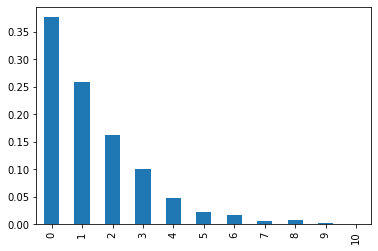

In [6]:
pmf_prior_pred = Pmf.from_seq(sample_prior_pred)
pmf_prior_pred.plot.bar()

In [7]:
with pm.Model() as model:
    lam = pm.Gamma('lam', alpha=1.4, beta=1.0)
    goals = pm.Poisson('goals', lam)

In [8]:
goals

goals ~ Poisson

In [14]:
with model:
    trace = pm.sample_prior_predictive(100)

In [15]:
trace

{'lam': array([1.00638343, 1.98226017, 0.96169243, 2.65531166, 1.92563169,
        0.14912252, 0.63875037, 1.15989718, 0.87443582, 0.42316179,
        0.27964343, 1.90742395, 1.30581237, 1.61434133, 2.11104657,
        4.48733737, 1.73220172, 2.36382084, 0.56096895, 2.03650478,
        1.23956503, 2.07363401, 1.98386486, 3.29425053, 0.48857362,
        2.222374  , 0.59137498, 1.40564477, 0.57302926, 1.60245556,
        1.36405046, 0.21381644, 0.27232718, 0.38229973, 1.00107527,
        0.56852425, 0.92932824, 0.15557406, 1.5199156 , 0.412503  ,
        0.27978666, 3.05957955, 1.35228815, 1.97510241, 2.22261168,
        0.71090383, 0.74772439, 1.70281734, 0.5471647 , 1.64012833,
        1.85343014, 3.98571839, 1.00554053, 0.27925813, 2.33035142,
        8.0644338 , 2.01249434, 0.58475486, 1.49788388, 0.18966158,
        1.45781202, 1.25681771, 0.35575425, 1.08112447, 0.96667824,
        1.08163214, 0.36488542, 1.39240382, 2.04448391, 1.16147384,
        0.05229304, 0.43146526, 2.3972359

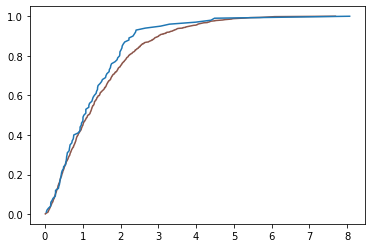

In [17]:
sample_prior_pymc = trace['lam']
plot_cdf(sample_prior, label='SciPy sample', color='C5')
plot_cdf(sample_prior_pymc, label='PyMC3 sample', color='C0')

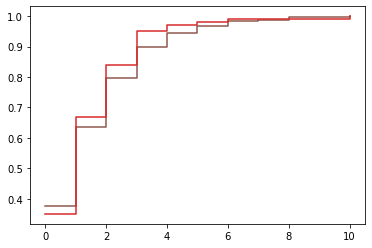

In [18]:
sample_prior_pred_pymc = trace['goals']
plot_pred(sample_prior_pred, label='SciPy sample', color='C5')
plot_pred(sample_prior_pred_pymc, label='PyMC3 sample', color='C13')

In [19]:
with pm.Model() as model2:
    lam = pm.Gamma('lam', alpha=1.4, beta=1.0)
    goals = pm.Poisson('goals', lam, observed=4)

In [20]:
options = dict(return_inferencedata=False)
with model2:
    trace2 = pm.sample(50, **options)

Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Sampling 4 chains for 1_000 tune and 50 draw iterations (4_000 + 200 draws total) took 21 seconds.
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The acceptance probability does not match the target. It is 0.9134291487441155, but should be close to 0.8. Try to increase the number of tuning steps.


In [22]:
sample_post_pymc = trace2['lam']
sample_post_pymc.shape

(200,)

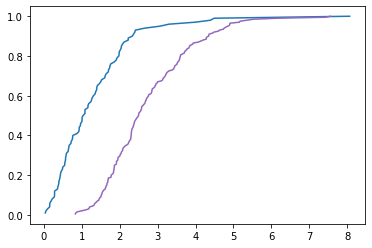

In [24]:
plot_cdf(sample_prior_pymc, label='PyMC3 sample', color='C0')
plot_cdf(sample_post_pymc, label='PyMC3 sample', color='C4')


In [25]:
with model2:
    post_pred = pm.sample_posterior_predictive(trace2)

In [26]:
sample_post_pred_pymc = post_pred['goals']
sample_post_pred_pymc.shape

(200,)

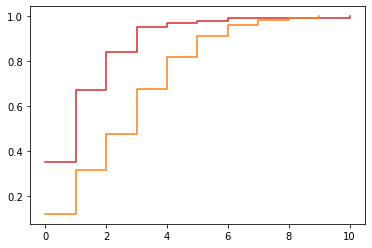

In [28]:
plot_pred(sample_prior_pred_pymc, label='PyMC3 sample', color='C13')
plot_pred(sample_post_pred_pymc, label='PyMC3 sample', color='C1')